## Name: Gautam Chutani
### GRIP - The Sparks Foundation
## Task-2: Prediction using Unsupervised ML
### Aim: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
# Importing the dataset
df_iris = pd.read_csv('Iris.csv')
print('Dataset imported successfully!!')

Dataset imported successfully!!


In [3]:
# Getting the first five values from dataset
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Since 'Id' column is not required, so we drop this column
df = df_iris.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Dimensionality of the dataset i.e number of rows and columns
df.shape

(150, 5)

In [7]:
# Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Statistical information of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Counting the value of unique species in dataset
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
# Finding pairwise correlation of all columns
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


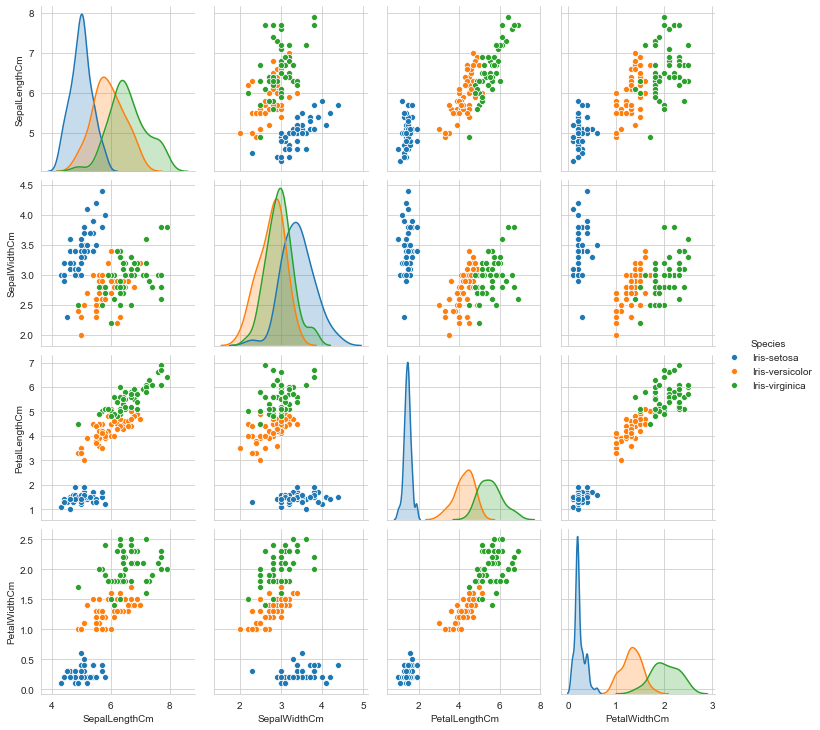

In [11]:
# Visualising the dataset through PairPlot

sns.set_style('whitegrid')
sns.pairplot(df, hue='Species');

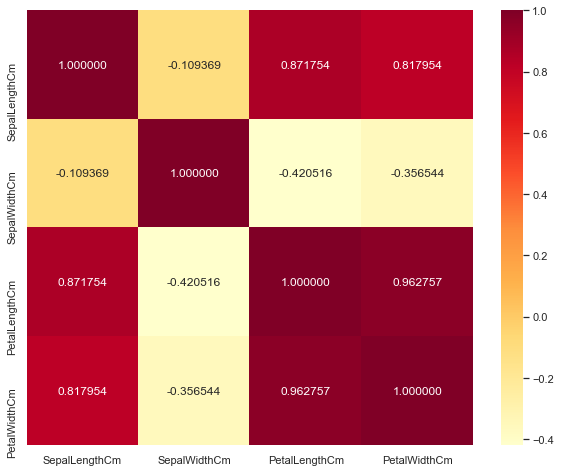

In [12]:
# Plotting heat map

sns.set()
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True, fmt='f', cmap='YlOrRd');

In [13]:
# Mapping Categorical Data i.e converting 'Species' category to numbers

df['Species_category']=df['Species'].astype("category")
df['Species_category']=df['Species_category'].cat.codes

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_category
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [14]:
df['Species_category'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

### Elbow Method for optimal value of k

In [16]:
# Finding optimum number of clusters

x = df.iloc[:, [0,1,2,3]].values

wcss = []              # within-cluster sum of square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

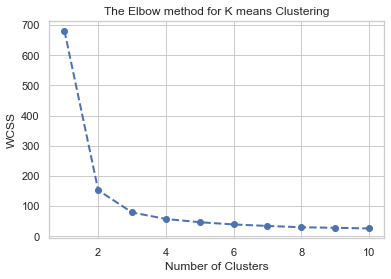

In [17]:
# Plotting the results on a Line Graph

sns.set_style('whitegrid')
plt.plot(range(1, 11), wcss, '--bo', linewidth = '2')

plt.title('The Elbow method for K means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph we observe that there is an elbow formation at k = 3. At this particular point, there is no significant decrease of value of within-cluster sum of squares(WCSS) . Hence the optimum value of k is 3. Therefore, we cluster the data set into 3 clusters.

### Applying Kmeans to the Dataset

In [18]:
# Creating the Kmeans Classifier

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [19]:
# Coordinates of cluster centers
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [20]:
# Predicting the closest cluster each sample in x belongs to

y_predictions = kmeans.predict(x)
y_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visual Represenation of Clusters : K-Means vs Actual for n_clusters=3

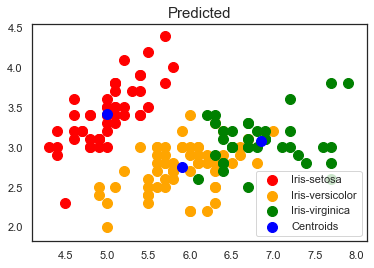

In [21]:
# Visualising the K-Means Clustering

sns.set_style('white')
plt.scatter(x[y_predictions == 0, 0], x[y_predictions == 0, 1], s=100, c='red', label = 'Iris-setosa')
plt.scatter(x[y_predictions == 1, 0], x[y_predictions == 1, 1], s=100, c='orange', label = 'Iris-versicolor')
plt.scatter(x[y_predictions == 2, 0], x[y_predictions == 2, 1], s=100, c='green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue', label = 'Centroids')

plt.title('Predicted', fontsize = 15)
plt.legend()

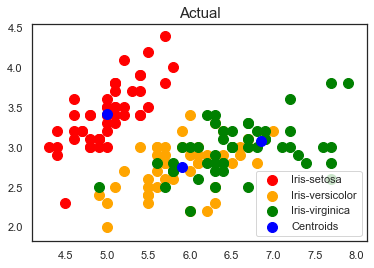

In [22]:
sns.set_style('white')
plt.scatter(x[df['Species_category'] == 0, 0], x[df['Species_category'] == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[df['Species_category'] == 1, 0], x[df['Species_category'] == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[df['Species_category'] == 2, 0], x[df['Species_category'] == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.title('Actual', fontsize = 15)
plt.legend()

### Evaluation of the Model

In [23]:
# Computing Confusion Matrix to evaluate the accuracy of the algorithm

sm.confusion_matrix(y_predictions, df['Species_category'].values)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

* Correctly identifed all 0 classes as 0’s
* Correctly classified 48 class of 1’s but mis-classified 2 class of 1’s as class 2
* Correctly classified 36 class of 2’s but mis-classified 14 class of 2’s as class 1

In [24]:
# Evaluating the performance of the model

accuracy = sm.accuracy_score(y_predictions, df['Species_category'].values)
print("Accuracy", accuracy*100, "%")

Accuracy 89.33333333333333 %


                                     Task-2 Completed Successfully!